In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr as pearr

In [2]:
trial_num1 = 5
model_num1 = 1
tissue_num = 27

ensg_name = json.load(open('whole_ensg2name.json'))
name_rsqr = json.load(open('low200_name2rsqr.json'))

gene_data_name = 'UTMOST_low200_Liver'
gene_list = os.listdir('../%s/'%gene_data_name)

r_ref_list = []
for g in range(150):
    gene_num = g+1
    gene_name = gene_list[g]
    gene_real_name = ensg_name[gene_name]
    gene_r_score = name_rsqr[gene_real_name]
    
    GX_observed = np.array([])
    GX_predicted = np.array([])

    for k in range(5):
        k_num = k+1

        try:
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                              %(trial_num1, gene_num, model_num1, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                              %(trial_num1, gene_num, model_num1, tissue_num, k_num))
        except FileNotFoundError:
            print('%d _ last saved snp2 loaded.'%gene_num)
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                              %(trial_num1, gene_num, model_num1, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                              %(trial_num1, gene_num, model_num1, tissue_num, k_num))

        GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                        %(trial_num1, gene_num, model_num1, tissue_num, k_num))
        GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                        %(trial_num1, gene_num, model_num1, tissue_num, k_num))

        GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
    R_, p = pearr(GX_observed, GX_predicted)
    R2 = R_**2
    
    r_ref_list.append(R2)
#     if R2>0.1:
#         plt.plot(GX_predicted, GX_observed, 'r*')
#         plt.title('[%d]%s : %.5f / ref=%.5f'%(gene_num, gene_name, R2, gene_r_score), fontsize=14)
#         plt.show()

8 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
24 _ last saved snp2 loaded.
34 _ last saved snp2 loaded.
44 _ last saved snp2 loaded.
44 _ last saved snp2 loaded.
46 _ last saved snp2 loaded.
46 _ last saved snp2 loaded.
97 _ last saved snp2 loaded.
97 _ last saved snp2 loaded.
124 _ last saved snp2 loaded.
124 _ last saved snp2 loaded.


In [3]:
trial_num = 6
model_num = 1
tissue_num = 27

r_list = []
for g in range(150):
    gene_num = g+1
    gene_name = gene_list[g]
    gene_real_name = ensg_name[gene_name]
    gene_r_score = name_rsqr[gene_real_name]
    
    GX_observed = np.array([])
    GX_predicted = np.array([])

    for k in range(5):
        k_num = k+1

        try:
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
        except FileNotFoundError:
            print('%d _ last saved snp2 loaded.'%gene_num)
            SNP2_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))
            SNP2_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teSNP2_k%d_last.npy'\
                              %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_tr = np.load('npy/trial%d/gene%d/model%d/%dtissue_trGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))
        GX_te = np.load('npy/trial%d/gene%d/model%d/%dtissue_teGX_k%d.npy'\
                        %(trial_num, gene_num, model_num, tissue_num, k_num))

        GX_observed = np.append(GX_observed, np.reshape(GX_te, -1))
        GX_predicted = np.append(GX_predicted, np.reshape(SNP2_te, -1))
    R_, p = pearr(GX_observed, GX_predicted)
    R2 = R_**2
    
    r_list.append(R2)
#     if R2>0.1:
#         plt.plot(GX_predicted, GX_observed, 'r*')
#         plt.title('[%d]%s : %.5f / ref=%.5f'%(gene_num, gene_name, R2, gene_r_score), fontsize=14)
#         plt.show()

36 _ last saved snp2 loaded.
36 _ last saved snp2 loaded.
36 _ last saved snp2 loaded.
48 _ last saved snp2 loaded.
48 _ last saved snp2 loaded.
81 _ last saved snp2 loaded.
135 _ last saved snp2 loaded.
142 _ last saved snp2 loaded.
142 _ last saved snp2 loaded.
145 _ last saved snp2 loaded.
145 _ last saved snp2 loaded.
145 _ last saved snp2 loaded.


avg 1 / 2 :  0.017254773565753008 0.023699125517065652


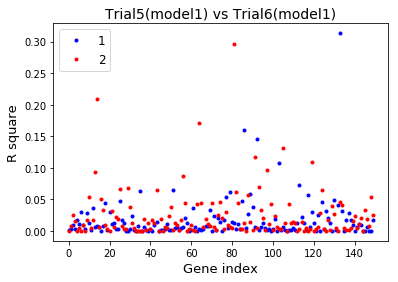

In [8]:
avg_utmost = np.mean(np.array(r_ref_list))
avg_model = np.mean(np.array(r_list))
print('avg 1 / 2 : ',avg_utmost, avg_model)

plt.title('Trial%d(model%d) vs Trial%d(model%d)'%(trial_num1, model_num1, trial_num, model_num), fontsize=14)
plt.plot(np.array(r_ref_list), 'b.', label='1')
plt.plot(np.array(r_list), 'r.', label='2')
# plt.plot([0,9],[avg_model, avg_model], 'r--', alpha=0.7)
# plt.plot([0,9],[avg_utmost, avg_utmost], 'b--', alpha=0.7)
plt.xlabel('Gene index', fontsize=13)
plt.ylabel('R square', fontsize=13)
plt.legend(fontsize=12)
# plt.savefig('img/trial%d/vsUTMOST_model%d.png'%(trial_num, model_num))
plt.show()